In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("sim_data_full.csv")
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
# df_pfpr = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [3]:
south_central_scenarios_to_plot = [1,56,57,
                                   4,58,59,
                                   13,34,35,
                                   16,60,61]
df1 = df_pfpr[np.logical_and(np.in1d(df_pfpr["archetype"], ["Central", "Southern"]),
                             np.in1d(df_pfpr["scenario_number"], south_central_scenarios_to_plot))].reset_index(drop=True)

sahel_scenarios_to_plot = [1,64,65,
                           4,66,67,
                           13,44,43, # note: Sahel scenarios are opposite order of ivermectin/primaquine
                           16,68,69]
df2 = df_pfpr[np.logical_and(df_pfpr["archetype"]=="Sahel",
                             np.in1d(df_pfpr["scenario_number"], sahel_scenarios_to_plot))].reset_index(drop=True)

df_plot = pd.concat([df1,df2], ignore_index=True)

# df_pfpr = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)].reset_index(drop=True)


In [4]:
list(df2.columns)

['archetype',
 'baseline_transmission_metric',
 'transmission_level',
 'scenario_number',
 'iptsc_rdts_used',
 'iptsc_drugs_used',
 'cases_treated',
 'severe_cases_treated',
 'received_smc',
 'received_ivermectin',
 'received_primaquine',
 'pfpr0_5',
 'pfpr2_10',
 'pfpr6_15',
 'pfpr16_500',
 'pfpr_all',
 'clinical_incidence0_5',
 'clinical_incidence2_10',
 'clinical_incidence6_15',
 'clinical_incidence16_500',
 'clinical_incidence_all',
 'severe_incidence0_5',
 'severe_incidence2_10',
 'severe_incidence6_15',
 'severe_incidence16_500',
 'severe_incidence_all',
 'pop0_5',
 'pop2_10',
 'pop6_15',
 'pop16_500',
 'pop_all',
 'avg_age',
 'avg_age_clinical_cases',
 'avg_age_severe_cases',
 'Run_Number',
 'iptsc_rdts_used_STDEV',
 'iptsc_drugs_used_STDEV',
 'cases_treated_STDEV',
 'severe_cases_treated_STDEV',
 'received_smc_STDEV',
 'received_ivermectin_STDEV',
 'received_primaquine_STDEV',
 'pfpr0_5_STDEV',
 'pfpr2_10_STDEV',
 'pfpr6_15_STDEV',
 'pfpr16_500_STDEV',
 'pfpr_all_STDEV',
 'clin

In [6]:
foo = df2[["scenario_number", "transmission_level", "frac_averted_clinical__all", "clinical_incidence_all","pfpr_all", "ivermectin", "primaquine", "drug_type", "interval"]]
foo = foo[np.in1d(foo["scenario_number"],[16,68,69])]
foo

,scenario_number,transmission_level,frac_averted_clinical__all,clinical_incidence_all,pfpr_all,ivermectin,primaquine,drug_type,interval
3,16,0.05,0.578653,0.308359,0.059528,False,False,DP,month
10,68,0.05,0.653039,0.253920,0.049658,True,False,DP,month
11,69,0.05,0.584927,0.303768,0.058187,False,True,DP,month
15,16,0.10,0.471410,0.478628,0.101338,False,False,DP,month
22,68,0.10,0.532930,0.422922,0.090067,True,False,DP,month
23,69,0.10,0.496420,0.455982,0.097138,False,True,DP,month
27,16,0.20,0.467021,0.552236,0.137277,False,False,DP,month
34,68,0.20,0.523526,0.493689,0.123743,True,False,DP,month
35,69,0.20,0.483668,0.534988,0.134238,False,True,DP,month
39,16,0.30,0.445095,0.641124,0.176078,False,False,DP,month


In [ ]:
sns.scatterplot(data=foo, x="clinical_incidence_all",y="pfpr_all", hue="transmission_level")

In [ ]:
foo.groupby

meta NOT subset; don't know how to subset; dropped


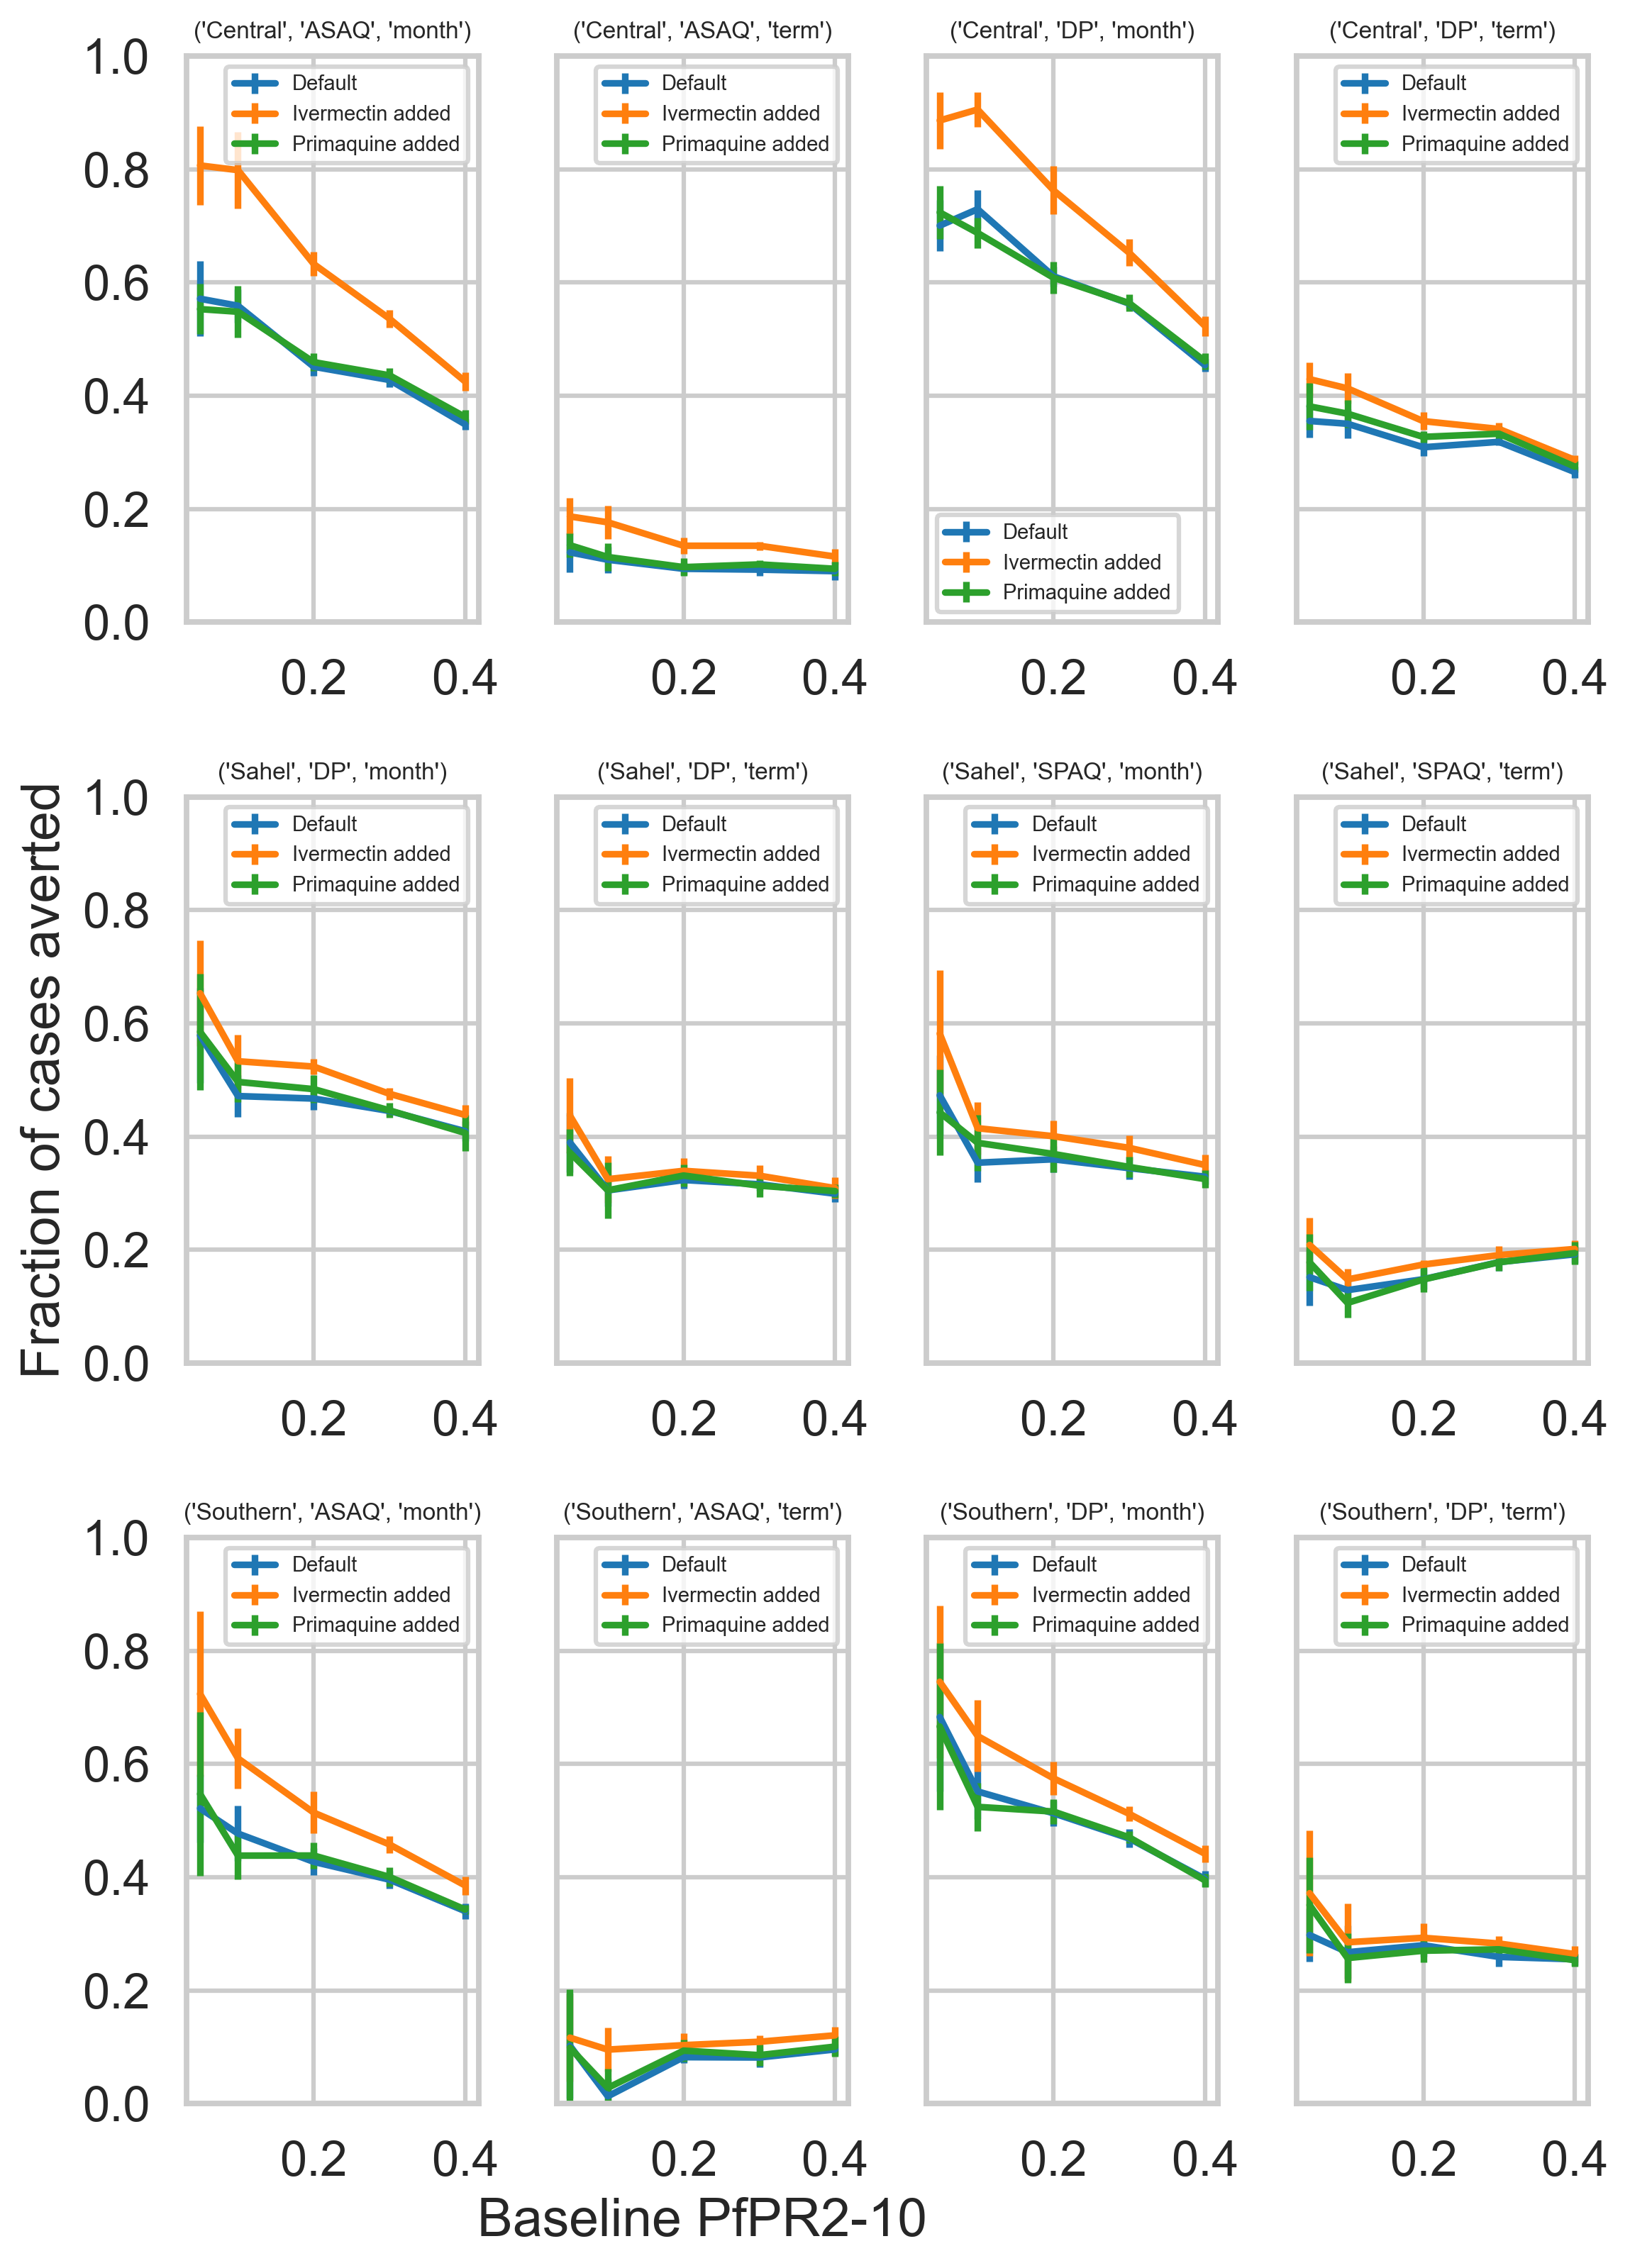

In [15]:
# h = df_pfpr[df_pfpr["archetype"]=="Southern"]
i = 1
plt.figure(dpi=300, figsize=(8,11))
for ii, sdf in df_plot.groupby(["archetype", "drug_type", "interval"]):
    

    regular = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==False)]
    iver = sdf[np.logical_and(sdf["ivermectin"]==True, sdf["primaquine"]==False)]
    prim = sdf[np.logical_and(sdf["ivermectin"]==False, sdf["primaquine"]==True)]
    
    plt.subplot(3,4,i)
    plt.errorbar(regular["transmission_level"], regular["frac_averted_clinical__all"], yerr=regular["frac_averted_clinical__all_STDEV"], label="Default")
    plt.errorbar(iver["transmission_level"], iver["frac_averted_clinical__all"], yerr=iver["frac_averted_clinical__all_STDEV"], label="Ivermectin added")
    plt.errorbar(prim["transmission_level"], prim["frac_averted_clinical__all"], yerr=prim["frac_averted_clinical__all_STDEV"], label="Primaquine added")
    plt.title(ii, fontsize=8)
    # plt.ylabel("Total cases averted")
    # plt.xlabel("Baseline PfPR2-10")
    
    # if i == 1:
    plt.legend(fontsize=7)
        
    if i not in [1,5,9]:
        ax = plt.gca()
        ax.set_yticklabels([])
    if i == 5:
        plt.ylabel("Fraction of cases averted")
    # if i in [9,10,11,12]:
        # plt.xlabel("Baseline PfPR2-10")
    if i == 10:
        plt.xlabel("Baseline PfPR2-10")
    
    plt.ylim([0,1.0])
    plt.tight_layout()
    i+=1
plt.savefig("transmission_target.pdf")
plt.savefig("transmission_target.png")

In [ ]:
sdf[np.logical_and(df_pfpr["ivermectin"]==False, df_pfpr["primaquine"]==False)]